# Análise Empresa

<span style="font-size: 20px;"> Características das Transações por Empresa

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
corporate_purchase = pd.read_csv('corporate-purchase.csv')
corporate_purchase['pos_neg'] = corporate_purchase['amount'].apply(lambda x: 'Positiva' if x>0 else ('Zero' if x==0 else 'Negativa'))
corporate_purchase.columns

Index(['id', 'status', 'created', 'cardId', 'holderId', 'amount',
       'merchantName', 'merchantCategoryType', 'workspaceId', 'pos_neg'],
      dtype='object')

In [220]:
#empresa = input('Qual empresa deseja analisar?: ')
empresa = '99 TAXI'
# exemplo para resultado
result = '99 TAXI \n'
empresa = corporate_purchase[corporate_purchase['merchantName']==empresa]

 ## Estatística Descritiva do Valor de Transação

In [221]:
empresa['amount'].describe()

count     4849.000000
mean      3695.420912
std       3719.845212
min      -5003.000000
25%          0.000000
50%       3333.000000
75%       6666.000000
max      15300.000000
Name: amount, dtype: float64

In [222]:
result += f'Transação mínima: {empresa["amount"].min()} R$\n'
result += f'Transação máxima: {empresa["amount"].max()} R$\n'
result += f'Transação média: {round(empresa["amount"].mean(),2)} R$\n'
result += f'Total de transações: {empresa["amount"].count()} \n'

## Transações e valor zero,  positivo e não positivo

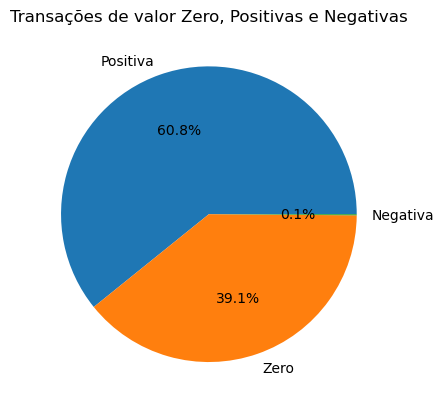

In [223]:
positive_negative_counts = empresa['pos_neg'].value_counts(normalize=True)
fig, ax = plt.subplots()
ax.pie(positive_negative_counts.values, labels=positive_negative_counts.index, autopct='%1.1f%%')
plt.title('Transações de valor Zero, Positivo e Negativo')
plt.show()

In [224]:
result += 'Transação de valor zero, positivo e negativo: \n'
for i in range(len(positive_negative_counts.index)):
    result+= f'{positive_negative_counts.index[i]}:{round(positive_negative_counts.values[i]*100,1)}% \n'

## Status

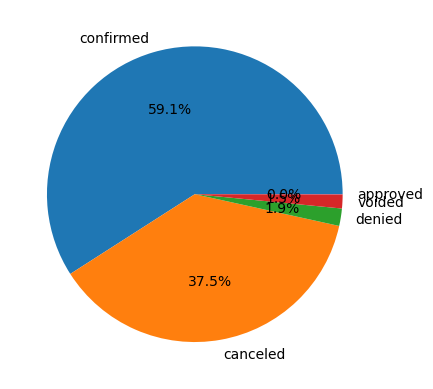

In [225]:
status_counts = empresa['status'].value_counts(normalize=True)
fig, ax = plt.subplots()
ax.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%')
plt.title('Proporção por Status')
plt.show()

In [226]:
result += 'Proporção por Status: \n'
for i in range(len(status_counts.index)):
    result+= f'{status_counts.index[i]}:{round(status_counts.values[i]*100,1)} %\n'

## Status por categoria de produto

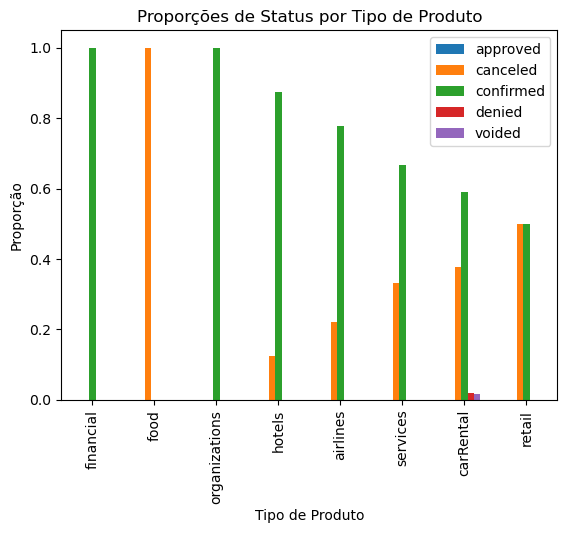

In [227]:
# contagem normalizada para status e categoria de produto
empresa_cat_status_counts = empresa.groupby('merchantCategoryType')['status'].value_counts(normalize=True).unstack(level=1)

# ordenando por status com maior proporção em cada categoria de produto
sorted_status_counts = empresa_cat_status_counts.loc[empresa_cat_status_counts.max(axis=1).sort_values(ascending=False).index]

# plotando status e categoria de produto
sorted_status_counts.plot(kind='bar')
plt.legend(loc='upper right')
plt.title('Proporções de Status por Tipo de Produto')
plt.ylabel('Proporção')
plt.xlabel('Tipo de Produto')
plt.xticks(rotation=45)
plt.show()

In [228]:
empresa_cat_status_counts = empresa.groupby('merchantCategoryType')['status'].value_counts(normalize=True)
result += 'Tipo de Produto da Transação, Status: \n'
for i in range(len(empresa_cat_status_counts.index)):
    result+= f'{empresa_cat_status_counts.index[i]}:{round(empresa_cat_status_counts.values[i]*100,1)}%\n'

## Total das Transações por status

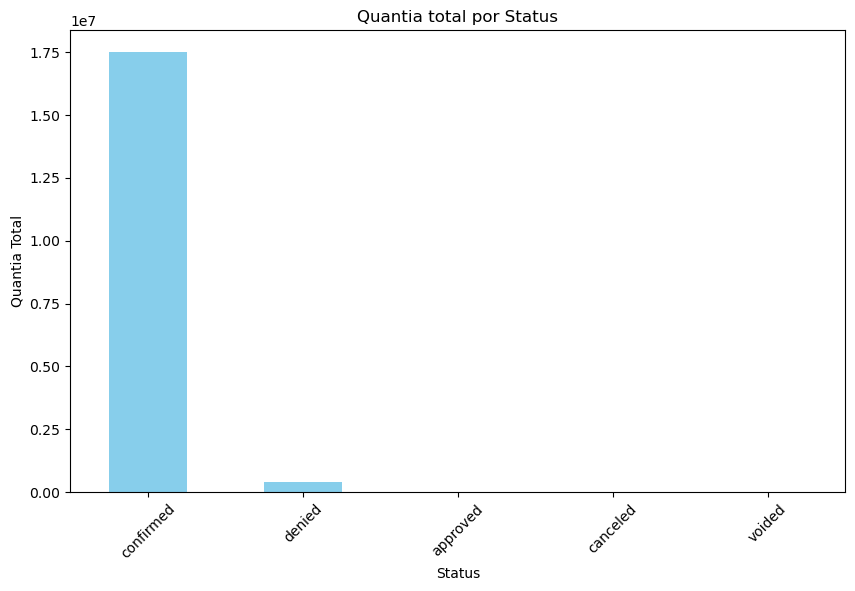

In [229]:
# soma do valor das transações por status
empresa_amount_categoria = empresa.groupby('status')['amount'].sum()
sorted_empresa_amount_categoria = empresa_amount_categoria.sort_values(ascending=False)
# plotando soma do valor das transações por status
plt.figure(figsize=(10, 6))
sorted_empresa_amount_categoria.plot(kind='bar', color='skyblue')
plt.title('Quantia total por Status')
plt.ylabel('Quantia Total')
plt.xlabel('Status')
plt.show()

In [230]:
result += 'Total das transações por status:'
for i in range(len(empresa_amount_categoria.index)):
    result+= f'{empresa_amount_categoria.index[i]}: {empresa_amount_categoria.values[i]} R$\n'

## Total das Transações por Categoria

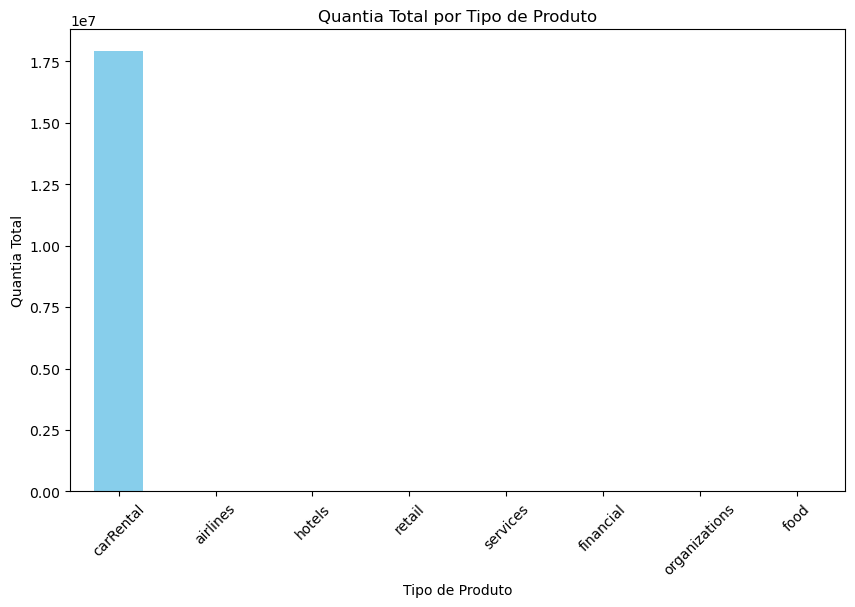

In [231]:
# soma do valor das transações por categoria de produto
empresa_amount_categoria = empresa.groupby('merchantCategoryType')['amount'].sum()
sorted_empresa_amount_categoria = empresa_amount_categoria.sort_values(ascending=False)
# plotando soma do valor das transações por categoria de produto
plt.figure(figsize=(10, 6))
sorted_empresa_amount_categoria.plot(kind='bar', color='skyblue')
plt.title('Quantia Total por Tipo de Produto')
plt.ylabel('Quantia Total')
plt.xlabel('Tipo de Produto')
plt.xticks(rotation=45)
plt.show()

In [232]:
result += 'Total das Transações por categoria:'
for i in range(len(empresa_amount_categoria.index)):
    result+= f'{empresa_amount_categoria.index[i]}: {empresa_amount_categoria.values[i]} R$\n'

# Resultado

In [233]:
print(result)

99 TAXI
Transação mínima: -5003 R$
Transação máxima: 15300 R$
Transação média: 3695.42 R$
Total de transações: 4849 
Transação de valor zero, positivas e negativas: 
Positiva:60.8% 
Zero:39.1% 
Negativa:0.1% 
Porcentagem por Status: 
confirmed:59.1 %
canceled:37.5 %
denied:1.9 %
voided:1.5 %
approved:0.0 %
Tipo de Produto da Transação, Status: 
('airlines', 'confirmed'):77.8%
('airlines', 'canceled'):22.2%
('carRental', 'confirmed'):58.9%
('carRental', 'canceled'):37.6%
('carRental', 'denied'):1.9%
('carRental', 'voided'):1.5%
('carRental', 'approved'):0.0%
('financial', 'confirmed'):100.0%
('food', 'canceled'):100.0%
('hotels', 'confirmed'):87.5%
('hotels', 'canceled'):12.5%
('organizations', 'confirmed'):100.0%
('retail', 'canceled'):50.0%
('retail', 'confirmed'):50.0%
('services', 'confirmed'):66.7%
('services', 'canceled'):33.3%
Total das transações por status:approved: 1000 R$
canceled: 0 R$
confirmed: 17493896 R$
denied: 424200 R$
voided: 0 R$
Total das Transações por categoria:a

In [234]:
with open('result_empresa.txt', 'w') as fp:
    fp.write(result)

In [235]:
empresas = str(corporate_purchase['merchantName'].unique())
with open('empresas.txt', 'w') as fp:
    fp.write(empresas)